In [ ]:
!pip install geopandas
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install geoplot
!pip3 install shapely==1.8.4
!pip install polyline

In [ ]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot as gplt

In [3]:
import json
import datetime

url="https://api.data.gov.sg/v1/transport/traffic-images"

date = datetime.datetime(2024, 1, 1, 0, 0, 00)
print(date.strftime("%Y-%m-%dT%H:%M:%S"))
params={
   "date_time" : date.strftime("%Y-%m-%dT%H:%M:%S")
}
data=requests.get(url,params=params)

data_json=data.json()
data=pd.json_normalize(data_json,record_path =['items','cameras'])
data.head()

2024-01-01T00:00:00


,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5
0,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1001,1.295313,103.871146,240,320,c02bb31ca61a9a702435f109d8438558
1,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1002,1.319541,103.878563,240,320,f9abe6c21cc2652ff9937350f37eb44f
2,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1003,1.323957,103.872858,240,320,7f2bf2d66f30441b389042dbd6e1cf85
3,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1004,1.319536,103.875067,240,320,f992215d22bc0164d9b856aed151b7ae
4,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1005,1.363520,103.905394,240,320,41d046d872b118c5aea0784124ba8258


### Download SHP file for Singapore's map
We will use this to plot the map and the traffic cameras

In [6]:
singapore=gpd.read_file("./data/SingaporeMapSHP/MP14_PLNG_AREA_NO_SEA_PL.shp")
singapore.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((30658.500 42047.527, 30679.195 42020..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((38974.269 36138.243, 39371.471 35747..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((29772.191 38311.805, 29784.826 38304..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((12861.383 32207.492, 12860.555 32208..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((20294.455 39114.528, 20334.318 39054..."


Convert the polygons to the "EPSG:4326" standard coordinate system

In [7]:
singapore = singapore.to_crs(epsg=4326)
singapore.head()

,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,ANG MO KIO,AM,N,NORTH-EAST REGION,NER,E5CBDDE0C2113055,2016-05-11,28976.8763,40229.1238,17494.240190,1.394138e+07,"POLYGON ((103.85721 1.39654, 103.85739 1.39630..."
1,2,BEDOK,BD,N,EAST REGION,ER,1719251260799DF6,2016-05-11,38582.6650,34032.0961,21872.798962,2.173319e+07,"POLYGON ((103.93193 1.34309, 103.93550 1.33956..."
2,3,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,2016-05-11,28789.7630,37450.8865,13517.121556,7.618921e+06,"POLYGON ((103.84924 1.36275, 103.84936 1.36268..."
3,4,BOON LAY,BL,N,WEST REGION,WR,A3DC87118B43CDED,2016-05-11,13410.3824,33008.9884,18528.467448,8.279408e+06,"POLYGON ((103.69729 1.30754, 103.69728 1.30755..."
4,5,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,2016-05-11,19255.4150,37527.6527,15234.223423,1.113326e+07,"POLYGON ((103.76408 1.37001, 103.76444 1.36947..."


### Plot the cameras onto the Singapore map

In [8]:
geodata=gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data["location.longitude"], data["location.latitude"]))
geodata.head()

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,geometry
0,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1001,1.295313,103.871146,240,320,c02bb31ca61a9a702435f109d8438558,POINT (103.87115 1.29531)
1,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1002,1.319541,103.878563,240,320,f9abe6c21cc2652ff9937350f37eb44f,POINT (103.87856 1.31954)
2,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1003,1.323957,103.872858,240,320,7f2bf2d66f30441b389042dbd6e1cf85,POINT (103.87286 1.32396)
3,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1004,1.319536,103.875067,240,320,f992215d22bc0164d9b856aed151b7ae,POINT (103.87507 1.31954)
4,2023-12-31T23:57:13+08:00,https://images.data.gov.sg/api/traffic-images/...,1005,1.363520,103.905394,240,320,41d046d872b118c5aea0784124ba8258,POINT (103.90539 1.36352)


/common/home/users/j/jxteoh.2023/.local/lib/python3.9/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

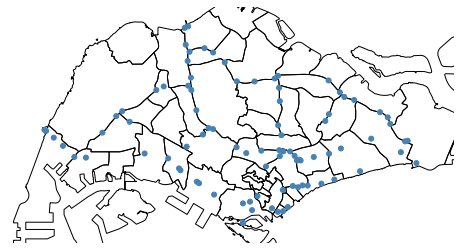

In [9]:
import geoplot.crs as gcrs
ax=gplt.polyplot(singapore)

gplt.pointplot(geodata,ax=ax)

### Label the points with camera ID

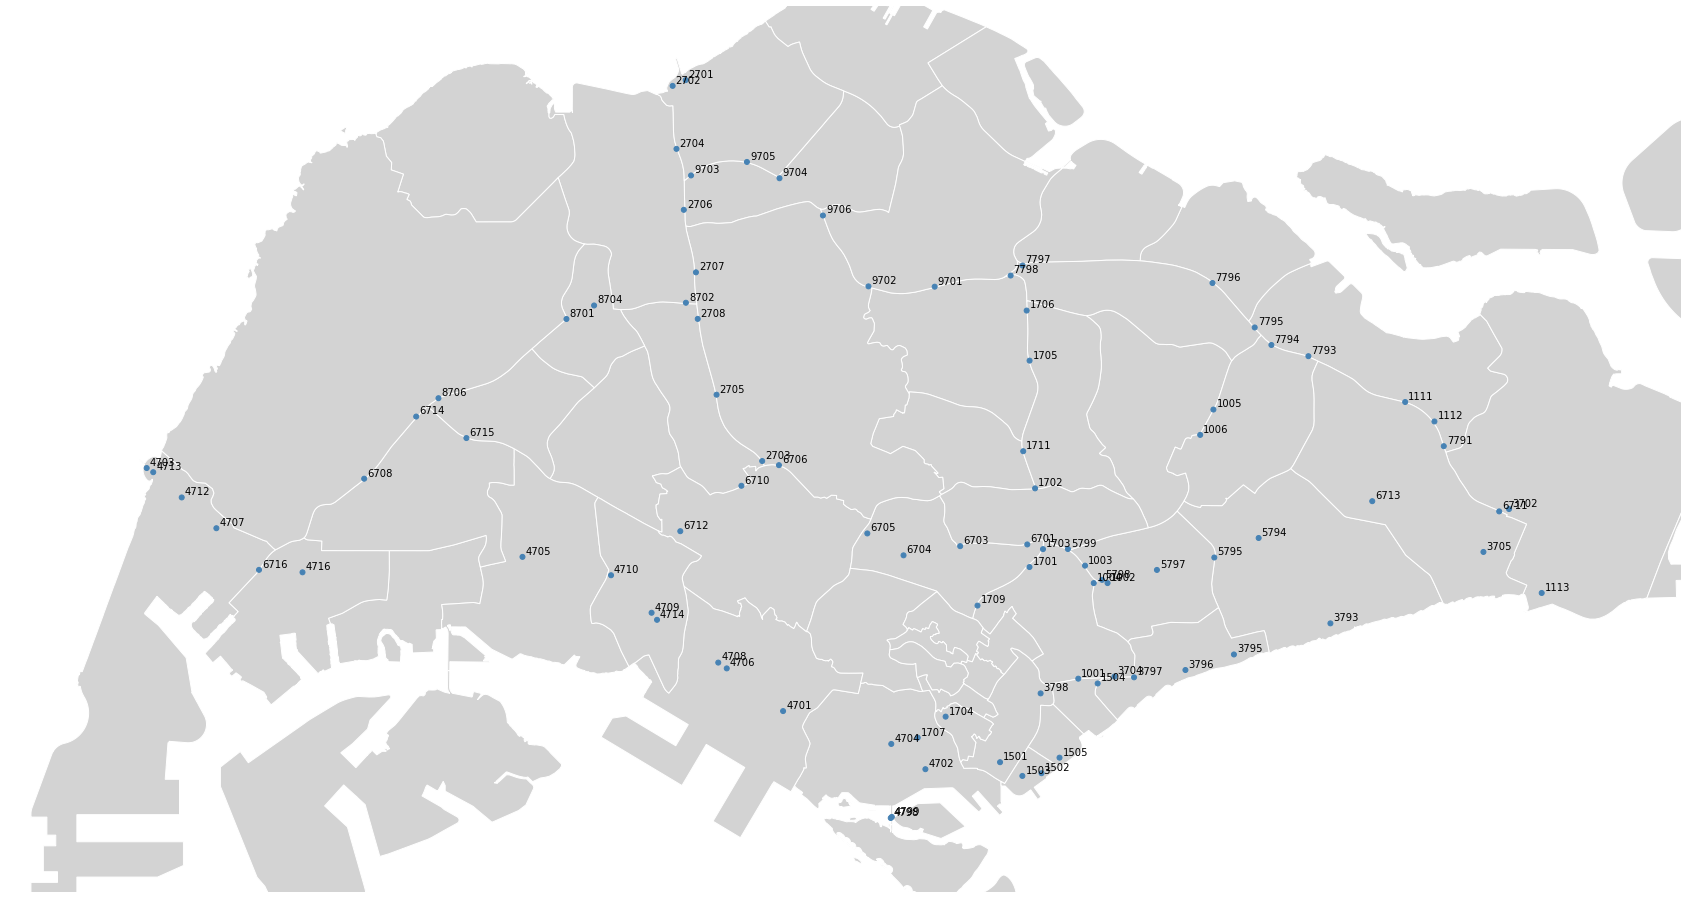

In [10]:
# Step 11: Plot the map with the camera and add labels on the camera locations
import geoplot.crs as gcrs

ax=gplt.polyplot(singapore,figsize=(30, 18),
    edgecolor='white', facecolor='lightgray',)

gplt.pointplot(geodata,ax=ax)
for x, y, label in zip(geodata.geometry.x, geodata.geometry.y, geodata.camera_id):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

### Fetching a route between current location and destination
We will use Google map's API to fetch current location and destination

In [11]:
api_key = "YOUR_API_KEY"

def geocode_address(address):
    url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        "address": address,
        "key": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if data['status'] == 'OK':
        location = data['results'][0]['geometry']['location']
        latitude = location['lat']
        longitude = location['lng']
        return latitude, longitude
    else:
        print("Geocoding failed:", data['status'])
        return None, None

def get_orig_dest_coord(current_location, destination_location):
    current_lat, current_lng = geocode_address(current_location)
    dest_lat, dest_lng = geocode_address(destination_location)

    if current_lat is not None and dest_lat is not None:
        return current_lat, current_lng, dest_lat, dest_lng

In [12]:
import requests
import json

# Define a function to compute the route between current location and dest
def compute_routes(origin_lat, origin_lng, dest_lat, dest_lng, api_key):
    url = "https://routes.googleapis.com/directions/v2:computeRoutes"
    
    headers = {
        "Content-Type": "application/json",
        "X-Goog-Api-Key": api_key,
        "X-Goog-FieldMask": "routes.duration,routes.distanceMeters,routes.polyline.encodedPolyline"
    }
    
    payload = {
        "origin": {
            "location": {
                "latLng": {
                    "latitude": origin_lat,
                    "longitude": origin_lng
                }
            }
        },
        "destination": {
            "location": {
                "latLng": {
                    "latitude": dest_lat,
                    "longitude": dest_lng
                }
            }
        },
        "travelMode": "DRIVE",
        "routingPreference": "TRAFFIC_AWARE",
        "computeAlternativeRoutes": False,
        "routeModifiers": {
            "avoidTolls": False,
            "avoidHighways": False,
            "avoidFerries": False
        },
        "languageCode": "en-US",
        "units": "IMPERIAL"
    }

    response = requests.post(url, headers=headers, json=payload)
    return response.json()

current_location = "Causeway Point, Singapore"
destination_location = "Singapore Management University, Singapore"

origin_lat, origin_lng, dest_lat, dest_lng = get_orig_dest_coord(current_location, destination_location)
response = compute_routes(origin_lat, origin_lng, dest_lat, dest_lng, api_key)
route = response["routes"][0]["polyline"]["encodedPolyline"]

In [13]:
# decode polyline into coordinates
import polyline
route_coord = polyline.decode(route)
route_coord[-1]

(1.29609, 103.85039)

In [14]:
from shapely.geometry import Point, LineString

# Define a function to check for intersections with traffic cameras
def check_intersections(route, traffic_cameras, threshold_distance=0.001):
    # polyline.decode() return lng, lat format
    route_line = LineString([(lat, lng) for lng, lat in route_coord])
    intersections = []
    for idx, camera in traffic_cameras.iterrows():
#         print(camera.geometry.type)
        if route_line.distance(camera.geometry) <= threshold_distance:
            intersections.append(idx)
    return intersections

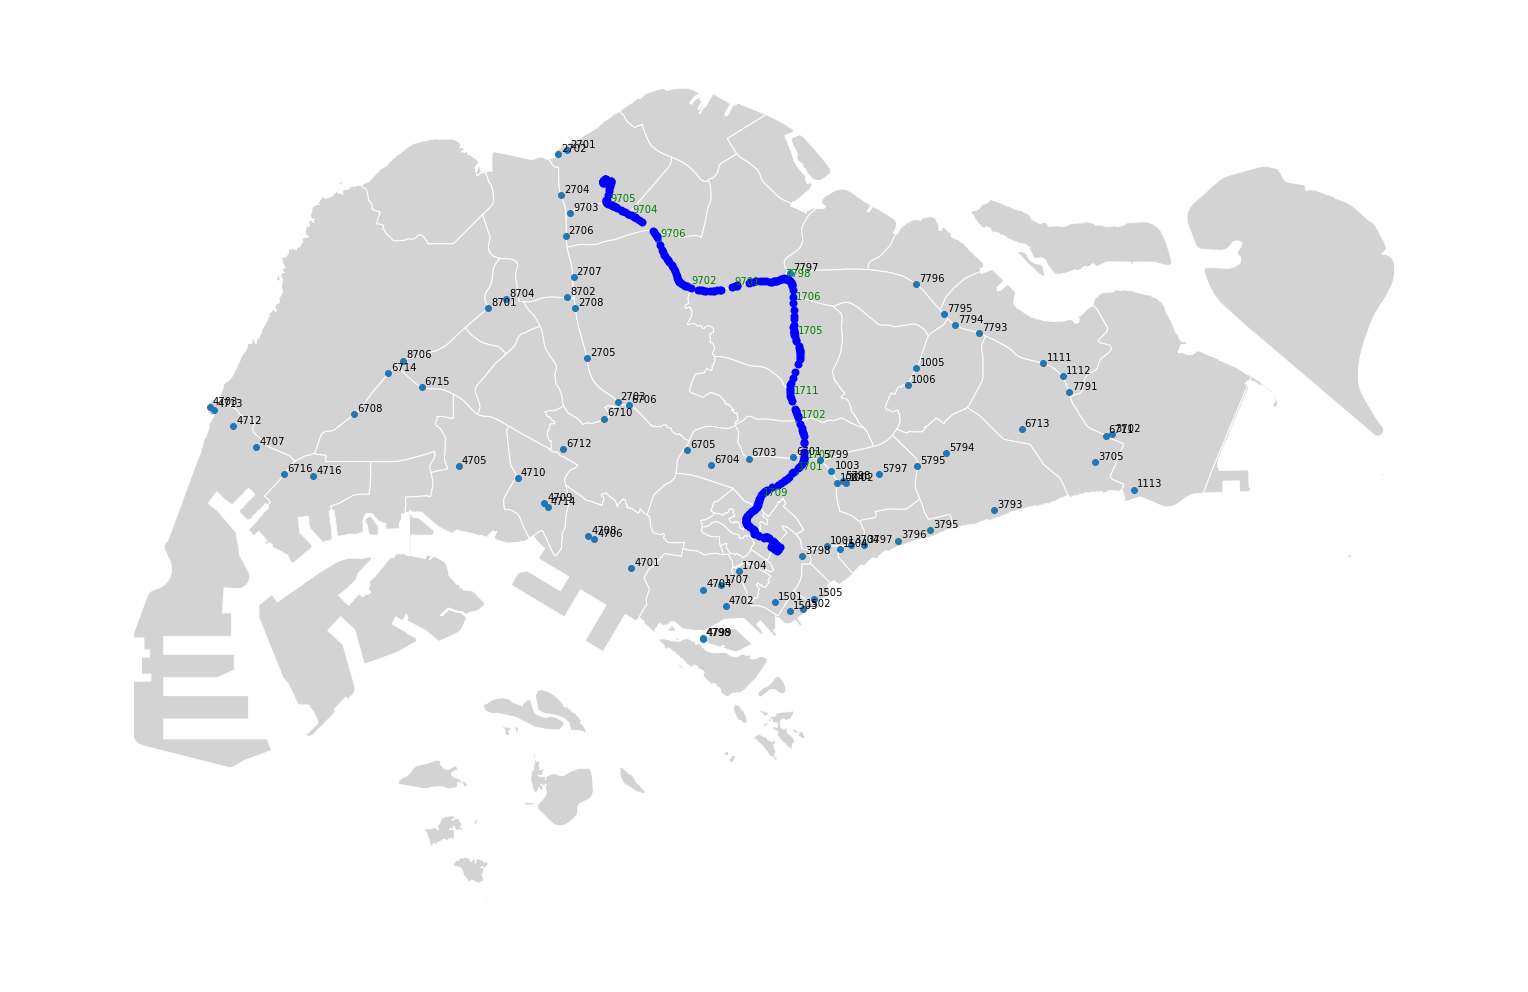

In [15]:
ax=gplt.polyplot(singapore,figsize=(30, 18),
    edgecolor='white', facecolor='lightgray',)

geodata.plot(ax=ax, aspect=1)
# for x, y, label in zip(geodata.geometry.x, geodata.geometry.y, geodata.camera_id):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# route_line = LineString(route_coord)
# route_df = gpd.GeoDataFrame(geometry=[route_line], crs=singapore.crs)
# route_df.plot(ax=ax, color='blue', linewidth=2)
route_df = pd.DataFrame(route_coord, columns=['longitude', 'latitude'])
route_gdf = gpd.GeoDataFrame(route_df, geometry=gpd.points_from_xy(route_df["latitude"], route_df["longitude"]))

# Plot the route points
# route_line = LineString(route_coord)
# route_df = gpd.GeoDataFrame(geometry=[route_line], crs=singapore.crs)

# Plot the route line
route_gdf.plot(ax=ax, color='blue', linewidth=2, aspect=1)
intersections = check_intersections(route_coord, geodata)
avail_camera_ids = []
# Highlight intersections on the map
for i, (x, y, label) in enumerate(zip(geodata.geometry.x, geodata.geometry.y, geodata.camera_id)):
    if (i in intersections):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", color='green')
        avail_camera_ids.append(label)
    else:
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
#     gplt.pointplot(geodata.geometry.iloc[intersections], ax=ax, color='green', linewidth=2, zorder=2)

In [16]:
avail_camera_ids

['1701',
 '1702',
 '1703',
 '1705',
 '1706',
 '1709',
 '1711',
 '7798',
 '9701',
 '9702',
 '9704',
 '9705',
 '9706']

In [17]:
url = "https://api.data.gov.sg/v1/transport/traffic-images"

# Get the current date and time
current_time = datetime.datetime.now()

# Format the current time as required by the API
current_time_str = current_time.strftime("%Y-%m-%dT%H:%M:%S")

# Set the parameters for the API request
params = {
    "date_time": current_time_str
}

# Make the API request
response = requests.get(url, params=params)

current_df_json=response.json()
current_df=pd.json_normalize(current_df_json,record_path =['items','cameras'])
current_df.head()
filtered_df = current_df[current_df['camera_id'].isin(avail_camera_ids)]
    
# Create a new column to specify the order
filtered_df['camera_order'] = filtered_df['camera_id'].apply(lambda x: avail_camera_ids.index(x))

# Sort the DataFrame based on camera_order
filtered_df = filtered_df.sort_values('camera_order')
filtered_df = filtered_df.reset_index(drop=True)

/common/home/users/j/jxteoh.2023/tmp/ipykernel_179798/3232071434.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['camera_order'] = filtered_df['camera_id'].apply(lambda x: avail_camera_ids.index(x))


In [18]:
from IPython.display import display, Image

for index, row in filtered_df.iterrows():
    display(Image(url=row['image']))

In [19]:
labels = {
    1001: "KPE(ECP)",
    1002: "Kallang Bahru",
    1003: "KPE(PIE)",
    1004: "Kallang Way Flyover",
    1005: "Defu Flyover",
    1006: "Tampines Flyover",
    1111: "TPE(PIE), Exit 2 to Loyang Ave",
    1112: "TPE(PIE), Tampines Viaduct",
    1113: "Tanah Merah Coast Road towards Changi",
    1501: "Maxwell Road",
    1502: "Marina Coastal Drive (Towards AYE)",
    1503: "MCE Eastbound",
    1504: "MCE(AYE)",
    1505: "Marina Boulevard (Towards ECP)",
    1701: "Moulmein Flyover",
    1702: "Braddell Flyover",
    1703: "CTE(PIE)",
    1704: "Chin Swee Road",
    1705: "Ang Mo Kio Ave 5 Flyover",
    1706: "Yio Chu Kang Flyover",
    1707: "Bukit Merah Flyover",
    1709: "Bukit Timah Road",
    1711: "Ang Mo Kio Avenue 1 Flyover",
    2701: "Woodlands Causeway",
    2702: "Woodlands Checkpoint",
    2703: "BKE(PIE)",
    2704: "Woodlands Flyover",
    2705: "Dairy Farm Flyover",
    2706: "Turf Club Avenue",
    2707: "Mandai Road",
    2708: "BKE(KJE)",
    3702: "ECP(PIE)",
    3704: "ECP(MCE)",
    3705: "Changi Coast Road",
    3793: "Laguna Flyover",
    3795: "Marine Parade Flyover",
    3796: "Tanjong Katong Flyover",
    3797: "Maxwell Road",
    3798: "Benjamin Sheares Bridge",
    4701: "Upper Thomson Flyover",
    4702: "Keppel Viaduct",
    4703: "Tuas Second Link",
    4704: "Lower Delta Road",
    4705: "Yuan Ching Roadd",
    4706: "Near NUS",
    4707: "Jln Ahmad Ibrahim",
    4708: "Near Dover Drive",
    4709: "Clementi Avenue 6",
    4710: "Pandan Gardens",
    4712: "Tuas West Road",
    4713: "Tuas Checkpoint",
    4714: "West Coast Walk",
    4716: "Benoi Road",
    4798: "Sentosa Gateway (Towards Telok Blangah)",
    4799: "Sentosa Gateway (Towards Sentosa)",
    5794: "Bedok North",
    5795: "Eunos Flyover",
    5797: "Paya Lebar Flyover",
    5798: "Kallang Way",
    5799: "Woodsville Flyover",
    6701: "Kim Keat Link",
    6703: "Thomson Flyover",
    6704: "Mount Pleasant",
    6705: "Adam Road",
    6706: "PIE (BKE)",
    6708: "Nanyang Flyover",
    6710: "Jalan Anak Bukit",
    6711: "Changi Airport",
    6712: "Clementi Avenue 6",
    6713: "Simei Avenue",
    6714: "PIE(KJE)",
    6715: "Hong Kah Flyover",
    6716: "Tuas Flyover",
    7791: "Upper Changi Flyover",
    7793: "Tampines Avenue 10",
    7794: "TPE(KPE)",
    7795: "Tampines Flyover",
    7796: "Punggol Flyover",
    7797: "Seletar West Link",
    7798: "Seletar Flyover",
    8701: "Choa Chu Kang West Flyover",
    8702: "KJE(BKE)",
    8704: "Choa Chu Kang Drive",
    8706: "Tengah Flyover",
    9701: "Lentor Flyover",
    9702: "Upper Thomson Flyover",
    9703: "SLE(BKE)",
    9704: "Woodlands Avenue 12",
    9705: "Marsiling Flyover",
    9706: "Mandai Flyover"
}